<a href="https://colab.research.google.com/github/earo12/Runge-Kutta/blob/main_variables/TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Constantes
m = 1.0
k = 1.0
gamma = 0.15
mu = 0.25


In [ ]:
def friccion(vx, vy):
    v = np.sqrt(vx**2 + vy**2)
    if v <= 1:
        return -gamma * np.array([vx, vy])
    else:
        return -mu * v**2 * np.array([vx, vy]) / v

def derivadas(r, v):
    fx, fy = friccion(v[0], v[1])
    ax = -k * r[0] + fx
    ay = -k * r[1] + fy
    return np.array([ax, ay])

def runge_kutta4(r0, v0, dt, t_final):
    n_steps = int(t_final / dt)
    r = np.zeros((n_steps, 2))
    v = np.zeros((n_steps, 2))
    r[0] = r0
    v[0] = v0

    for i in range(n_steps - 1):
        k1_v = dt * derivadas(r[i], v[i])
        k1_r = dt * v[i]

        k2_v = dt * derivadas(r[i] + 0.5 * k1_r, v[i] + 0.5 * k1_v)
        k2_r = dt * (v[i] + 0.5 * k1_v)

        k3_v = dt * derivadas(r[i] + 0.5 * k2_r, v[i] + 0.5 * k2_v)
        k3_r = dt * (v[i] + 0.5 * k2_v)

        k4_v = dt * derivadas(r[i] + k3_r, v[i] + k3_v)
        k4_r = dt * (v[i] + k3_v)

        r[i + 1] = r[i] + (k1_r + 2 * k2_r + 2 * k3_r + k4_r) / 6
        v[i + 1] = v[i] + (k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6

    return r, v


In [ ]:

# Condiciones iniciales
r0 = np.array([0, 1])
theta_values = [n * np.pi / 6 for n in range(12)]
t_final = 50  # tiempo final
dt = 0.01  # paso de tiempo


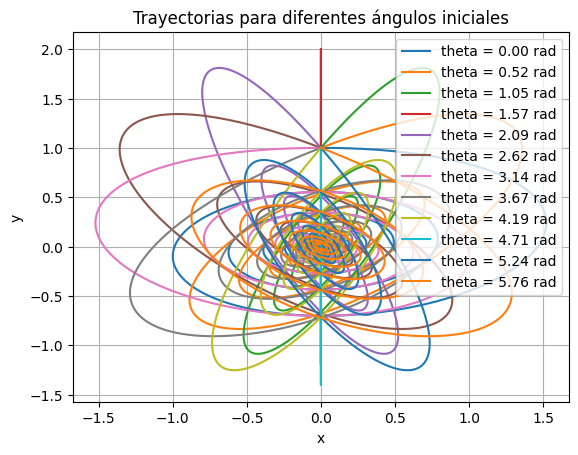

In [ ]:
# Correr simulaciones para diferentes ángulos
for theta in theta_values:
    v0 = np.array([2 * np.cos(theta), 2 * np.sin(theta)])
    r, v = runge_kutta4(r0, v0, dt, t_final)
    plt.plot(r[:, 0], r[:, 1], label=f'theta = {theta:.2f} rad')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Trayectorias para diferentes ángulos iniciales')
plt.grid(True)
plt.show()